In [44]:
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
from google.colab import files
uploaded = files.upload()

Saving tested.csv to tested (1).csv


In [46]:
data=pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
data.shape

(418, 12)

In [48]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

0 indicates dead and 1 indicates alive . That means 266 people are dead and 152 people are alive.lets plot the bar graph.

<function matplotlib.pyplot.show(close=None, block=None)>

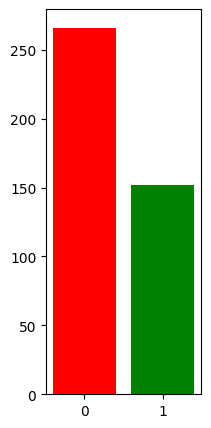

In [49]:
plt.figure(figsize=(2,5))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()),color=["r","g"])
plt.show

In [50]:
data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Pclass means passanger class , 218 people are in 3rd class , 107 people are in 1st class and 93 people are in 2nd class. let plot the graph.

<function matplotlib.pyplot.show(close=None, block=None)>

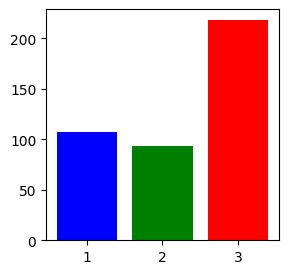

In [51]:
plt.figure(figsize=(3,3))
plt.bar(list(data['Pclass'].value_counts().keys()),list(data['Pclass'].value_counts()),color=["r","b","g"])
plt.show

In [52]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

266 people are male and 152 people are female

<function matplotlib.pyplot.show(close=None, block=None)>

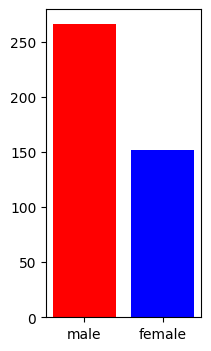

In [53]:
plt.figure(figsize=(2,4))
plt.bar(list(data['Sex'].value_counts().keys()),list(data['Sex'].value_counts()),color=["r","b"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

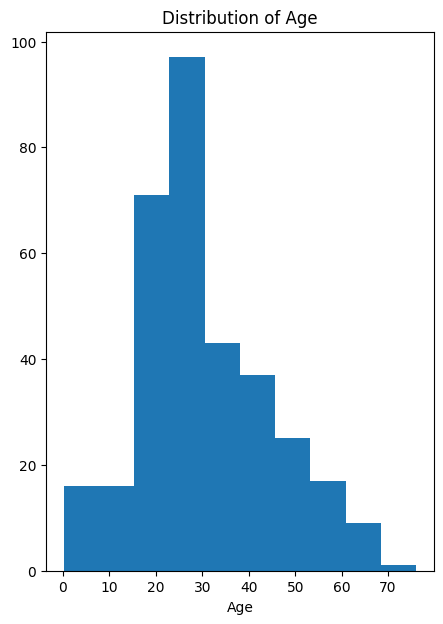

In [54]:
plt.figure(figsize=(5,7))
plt.hist(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show

In [55]:
sum(data['Survived'].isnull())

0

Survived column has no null values

In [56]:
sum(data['Age'].isnull())

86

86 rows have null values in age column

In [57]:
sum(data['Embarked'].isnull())

0

In [58]:
sum(data['Fare'].isnull())

1

In [59]:
sum(data['Ticket'].isnull())

0

PassengerId , Name and cabin does not effect the output . so , let drop that columns.

In [60]:
data=data.drop(['PassengerId','Name','Cabin'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S


if we use dropna then our dataset size will reduce ,  so instead of doing that let replace that null value with some random value.

In [61]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [62]:
data['Age']=data['Age'].fillna(30)
data['Fare']=data['Fare'].fillna(32)
encoder=OrdinalEncoder()
data['Ticket']=encoder.fit_transform(data[['Ticket']])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,152.0,7.8292,Q
1,1,3,female,47.0,1,0,221.0,7.0000,S
2,0,2,male,62.0,0,0,73.0,9.6875,Q
3,0,3,male,27.0,0,0,147.0,8.6625,S
4,1,3,female,22.0,1,1,138.0,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,30.0,0,0,267.0,8.0500,S
414,1,1,female,39.0,0,0,324.0,108.9000,C
415,0,3,male,38.5,0,0,346.0,7.2500,S
416,0,3,male,30.0,0,0,220.0,8.0500,S


In [63]:
data=pd.get_dummies(data)
data

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,152.0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,221.0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,73.0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,147.0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,138.0,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,30.0,0,0,267.0,8.0500,0,1,0,0,1
414,1,1,39.0,0,0,324.0,108.9000,1,0,1,0,0
415,0,3,38.5,0,0,346.0,7.2500,0,1,0,0,1
416,0,3,30.0,0,0,220.0,8.0500,0,1,0,0,1


In [64]:
y=data['Survived']#output
x=data.drop(['Survived'],axis=1)#input

In [65]:
x.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,152.0,7.8292,0,1,0,1,0
1,3,47.0,1,0,221.0,7.0000,1,0,0,0,1
2,2,62.0,0,0,73.0,9.6875,0,1,0,1,0
3,3,27.0,0,0,147.0,8.6625,0,1,0,0,1
4,3,22.0,1,1,138.0,12.2875,1,0,0,0,1


In [66]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [69]:
x_train
x_train.shape

(334, 11)

In [70]:
y_train

20     0
306    0
142    0
14     1
284    1
      ..
323    0
192    0
117    1
47     0
172    0
Name: Survived, Length: 334, dtype: int64

In [71]:
x_test
x_test.shape

(84, 11)

In [72]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_predict=model.predict(x_test)

In [74]:
y_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [75]:
acc=accuracy_score(y_test,y_predict)
acc

1.0